### EVALUATION EXCERCISE 

### Part 1

We use a Gaussian number generator to produce two samples of $N=10^{5}$ instances of two Gaussian-distributed random numbers, $a$ and $b$. Both follow a Gaussian distribution with mean $\mu =0.0$ and standard deviation $\sigma=2.0$, 

\begin{equation}
    f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x-\mu)^{2}/2\sigma^{2}} = \frac{1}{\sqrt{8\pi}}e^{-x^{2}/8}.
\end{equation}

From each pair of values, ($a_{i},b_{i}$), we obtain a third random number $c_{i}=a_{i}/b_{i}$. The values of this third sample follow a Cauchy distribution, $g(c)$, as we will prove later. That is, with undefined mean and diverging higher moments. 

Then, we compute the sample mean for the samples $a$ and $c$, defined as:

\begin{equation}
    \bar{x}=\frac{1}{N}\sum_{i=1}^{N} x_{i}, 
\end{equation}

where $x$ corresponds to the random variable considered. 

Once we have the sample means, we compute how far those values are from the expected value of the random variables $a$ and $c$, in units of the standard deviation of the sample mean,

\begin{equation}
    \sigma_{\bar{x}}=\frac{\sigma_{x}}{\sqrt{N}}.
\end{equation}

Since the expected value of the variable $c$ is not well-defined, we will only be able to compute this last step in the case of the variable $a$.

To obtain $g(c)$ we proceed in the following way: 

We have values of $a$ and $b$ sampled from pdfs $f(a)$ and $f(b)$, that are identical Gaussian distributions with $\mu=0$ and $\sigma=2$. Thus $a$ and $b$ are independent and identically distributed values. We can define the joint pdf as $f(a,b)=f(a)f(b)$.

We perform the change of variables $c=a/b$ and $v=b$. That is, $a=cv$, $b=v$. The joint pdfs of both pairs of variables need to fulfill: 

\begin{equation}
    h(c,v)dcdv = f(cv)f(v)|J|dcdv=f(cv)f(v)|v|dcdv \;\;\;\; \textrm{where} \;\;\;\; |J| = \Big|Det\Big(\frac{\partial(x,y)}{\partial(c,v)}\Big)\Big|,
\end{equation}

cause we only performed a change of variables. The value of $h(c,v)dcdv$ will be positive (negative) when $v$ is positive (negative).

Since we are interested in the pdf of the variable $c$, we obtain it computing the marginal pdf of $c$, 

\begin{equation}
    g(c)= \int_{-\infty}^{\infty}h(c,v)dv = \frac{2}{8\pi}\int_{0}^{\infty} v exp\Big(-\frac{v^{2}(1+c^{2})}{8}\Big)dv  = \frac{1}{\pi(1+c^{2})},
\end{equation}

that corresponds to a Cauchy distribution.

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style

In [35]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 1

In [36]:
N=100000; mean=0.0; std=2.0 #Number of instances N, mean and standard deviation of the Gaussian pdfs

In [37]:
%%time

# Defines seed to obtain the same values each time when generating random numbers
np.random.seed(2718)

#Generates N pairs of random numbers a and b, following Gaussian distribution. Computes N values of c as c_{i}=a_{i}/b_{i} 
#for each pair of (a_{i},b_{i})
a=np.random.normal(mean,std,N)
b=np.random.normal(mean,std,N)
c=a/b

#Computes the sample mean of the samples of variables a and c
sample_mean_a=np.mean(a)
sample_mean_c=np.mean(c)

#Computes the standard deviation of the sample mean for variable a. Computes the distance between the real and the sample mean 
#in terms of the standard deviation of the sample mean.
std_sample_mean=std/np.sqrt(N) 
distance=np.abs(sample_mean_a-mean)/std_sample_mean

print("Variable a")
print("The sample mean is: ", sample_mean_a)
print("The standard deviation of the sample mean is: ", std_sample_mean)
print("In units of these value, the distance between the sample mean and the expected value is: ", distance)
print('\n')
print("Variable c")
print("The sample mean is: ", sample_mean_c)
print("The expected value of c is undefined. The distance between the sample mean and the expected value cannot be computed. ")

Variable a
The sample mean is:  0.0010282386700091097
The standard deviation of the sample mean is:  0.006324555320336758
In units of these value, the distance between the sample mean and the expected value is:  0.16257880877455272


Variable c
The sample mean is:  1.5144012141549832
The expected value of c is undefined. The distance between the sample mean and the expected value cannot be computed. 
Wall time: 11 ms


$\textbf{Expected value of a Cauchy-distributed random variable:}$

We said that the expected value of a Cauchy-distributed random variable is not well defined. Let's check that.

The expected value corresponds to

\begin{equation}
    E(x) = \int_{-\infty}^{\infty} x f(x) dx,
\end{equation}

where $f(x)$ is the pdf of the variable $x$. In the case of the Cauchy pdf we have

\begin{equation}
    E(x) = \int_{-\infty}^{\infty} \frac{x}{\pi(1+x^{2)}}dx.
\end{equation}

We proceed in the following way: 

\begin{equation}
    E(x) = \int_{-\infty}^{\infty} \frac{x}{\pi(1+x^{2})}dx = \lim_{a\to -\infty} \int_{a}^{0} \frac{x}{\pi(1+x^{2})}dx + \lim_{a\to\infty}\int_{0}^{a} \frac{x}{\pi(1+x^{2})}dx = (1) + (2).
\end{equation}

We know that:

\begin{equation}
    E(x) = \int_{a}^{b} \frac{x}{\pi(1+x^{2)}}dx = \frac{1}{2}\Big[ ln|1+x^{2}|\Big ]_{a}^{b}.
\end{equation}

In (1) we have:

\begin{equation}
    E(x) = \lim_{a\to -\infty} -\frac{1}{2} ln|1+a^{2}| = -\infty,
\end{equation}

and in (2):

\begin{equation}
    E(x) = \lim_{a\to \infty} \frac{1}{2} ln|1+a^{2}| = \infty .
\end{equation}


Thus E(x) diverges and the mean is not defined in the Cauchy distribution. 

$\textbf{Discussion}$

We see that the sample mean of the values of $a$, $\bar{x}=0.001$ is really close to the distribution mean, $\mu=0.000$. The distance between them is $d=0.163 \sigma_{\bar{x}}$, where $\sigma_{\bar{x}}=0.006$ is the sample mean standard deviation. 

This result follows from the law of large numbers. This theorem says that when we generate a sample of random numbers following a pdf, the sample mean approaches the distribution mean, as we increase the size of the sample $N$. In the limit of $N$ going to $\infty$ we have

\begin{equation}
    \lim_{N\to\infty} \sum_{i=1}^{N} \frac{x_{i}}{N} \to \mu.
\end{equation}

In the case of the variable $c$, the sample mean can be computed but the distribution mean is not defined, as we have proved before. 

### Part 2

We generate a histogram of the $N$ values of $a$. We compare it with its pdf. We do the same in the case of the variable $c$.

The values of the histograms are normalized so that the sum of all of them equals 1. This way we can compare the results with the pdf, whose area under the curve also equals 1. If one wants to know the counts in each range of values, she only needs to multiply the value obtained in the histograms by the number of elements in the sample, $N$.

In [38]:
# Given a value x, a mean and a standard deviation, returns the corresponding value of y following a gaussian distribution
# with that mean and standard deviation.
def gaussian(x,mean,std):
    return (1./(np.sqrt(2*math.pi)*std))*np.exp(-(x-mean)**2/(2*std**2))

In [39]:
#Values of x to compute Gaussian distribution
x=np.linspace(np.min(a),np.max(a),100)

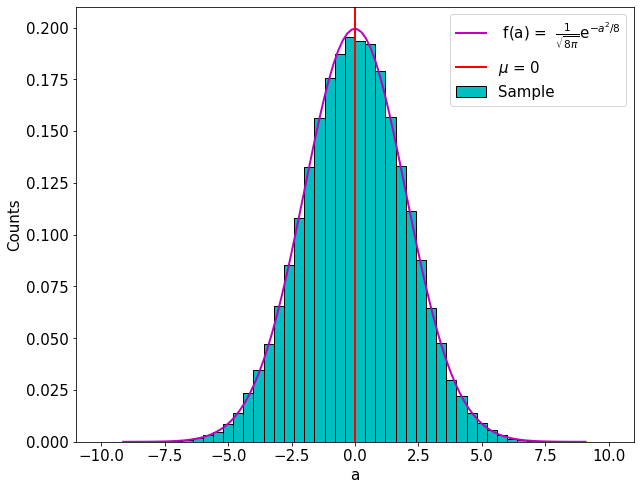

Wall time: 483 ms


In [40]:
%%time
#Plot the histogram for the sample of a, normalized to make the sum of all the bins equal to 1
plt.hist(a, bins=50, range=(-10,10),density=True, color="c", label='Sample',edgecolor = "black")
plt.plot(x,gaussian(x,mean,std), color="m", lw='2', label=r' f(a) =  $\frac{1}{\sqrt{8 \pi}} \mathrm{e}^{- a^2/8}$')
plt.axvline(x=0,color="r", lw='2', label= r'$\mu$ = 0')
plt.ylim([0,0.21])
plt.legend()
plt.xlabel('a')
plt.ylabel('Counts')
plt.show()

In [41]:
# Given a value x, returns the corresponding value of y following a Cauchy distribution.
def cauchy(x):
    return 1./(math.pi*(1+x**2))

In [42]:
#Values of x to compute Cauchy distribution
x1=np.linspace(np.min(c),np.max(c),100000)

In [43]:
#Limits of the bins of the histogram
bins=np.linspace(np.min(c),np.max(c),100)

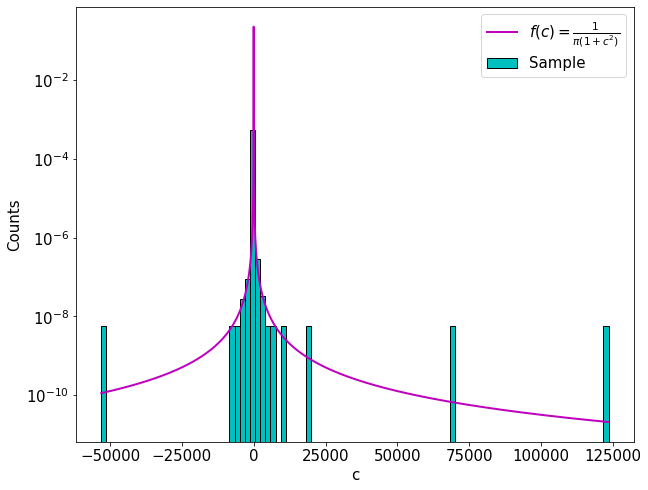

In [44]:
#Plots histogram of sample of variable c and pdf
plt.hist(c, bins=bins, density=True, color="c", label='Sample',edgecolor = "black")
plt.plot(x1,cauchy(x1), color="m", lw='2', label=r'$ f(c) =\frac{1}{\pi(1 + c^{2})}$')
plt.yscale("log")
plt.legend()
plt.xlabel('c')
plt.ylabel('Counts')
plt.show()

As one can see in the histogram above, the Cauchy distribution has really long tails. Let's focus on the central part and plot only the central part of the distribution. 

In [45]:
x2=np.linspace(-20,20,100)

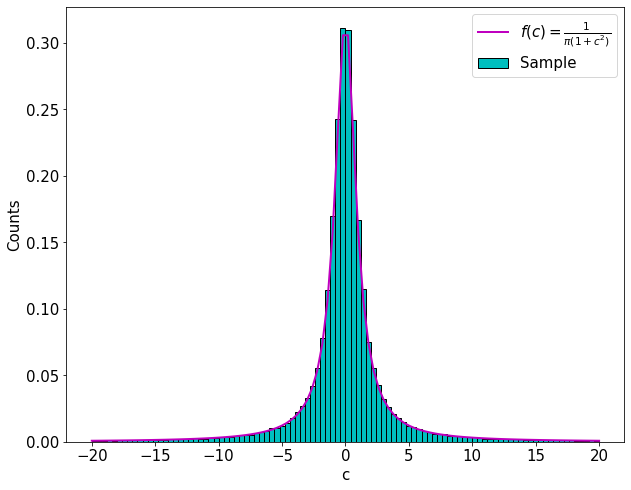

In [46]:
plt.hist(c, bins=100, range=(-20,20), density=True, color="c", label='Sample',edgecolor = "black")
plt.plot(x2,cauchy(x2), color="m", lw='2', label=r'$ f(c) =\frac{1}{\pi(1 + c^{2})}$')
plt.legend()
plt.xlabel('c')
plt.ylabel('Counts')
plt.show()

In both cases the pdfs chosen fits the sample distribution. The choice of the pdf of variable $c$ was explained above.

### Part 3

We now create samples of $m_{k}=2^{k}$ values following the pdf of variable $c$, with $k= 1,2,...,26$. We compute the mean of each sample and represent it as a function of $m_{k}$. We do the same with the pdf of $a$.

In [47]:
%%time
#Generates the values mk=2^k for k=1,2,...,26. Generates samples of a Gaussian-distributed variable with mean=0 and standard
#deviation=2 and of a Cauchy-distributed variable, with sizes equal to each value of mk. For each sample compute the sample mean
#and stores separately the values for each type of sample. 
mean_cauchy=np.zeros(26)
mean_gauss=np.zeros(26)
k=np.linspace(0,25,26)
mk=[2**(int(i)+1) for i in k]
for i in k:
    i=int(i)
    v_1=np.random.normal(mean,std,mk[i])
    v_2=np.random.normal(mean,std,mk[i])
    v_3=v_1/v_2
    mean_cauchy[i]=np.mean(v_3)
    mean_gauss[i]=np.mean(v_1)

Wall time: 10.5 s


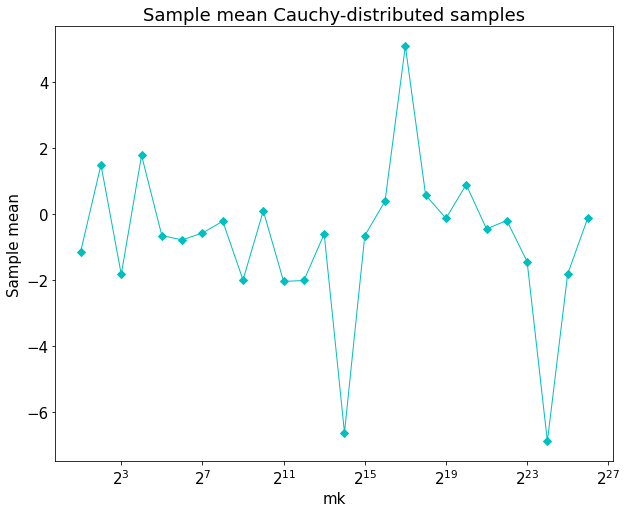

In [48]:
#Plots the values of the sample mean of the Cauchy-distributed samples as a function of mk
plt.plot(mk,mean_cauchy,'-D',color='c')
plt.xlabel('mk')
plt.xscale('log', base=2)
plt.ylabel('Sample mean')
plt.title('Sample mean Cauchy-distributed samples')
plt.show()

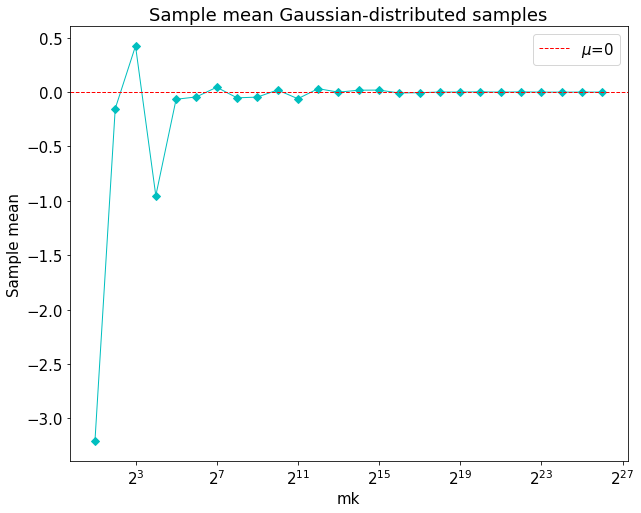

In [49]:
#Plots the values of the sample mean of the Gaussian-distributed samples as a function of mk
plt.plot(mk,mean_gauss,'-D',color='c')
plt.axhline(y=0,color='red',ls='--', label=r'$\mu$=0')
plt.xlabel('mk')
plt.xscale('log', base=2)
plt.ylabel('Sample mean')
plt.legend()
plt.title('Sample mean Gaussian-distributed samples')
plt.show()

Due to the law of large numbers, mentioned previously, if we sample values from a pdf, the sample mean of these values will tend to the distribution mean as we increase the size of the sample. We can see this result in the case of the Gaussian-distributed sample. 

On the other hand, in the case of the values following a Cauchy pdf, the distribution mean is undefined. Because of this, the value of the sample mean oscillates and doesn't converge to a value as we increase the size of the sample.  

In [3]:
(1613.70-21)

1592.7